In [ ]:
#Link to Dataset https://mi.eng.cam.ac.uk/research/projects/VideoRec/CamVid/

In [1]:
import os
import numpy as np
import cv2 
import matplotlib.pyplot as plt
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

from torch.utils.data import Dataset as BaseDataset



In [61]:
data_dir = r'D:\01_UMCP\Spring 24\ENPM 673\Project 4\CamVid'
x_train_dir = os.path.join(data_dir, 'train')
y_train_dir = os.path.join(data_dir, 'train_labels')

x_valid_dir = os.path.join(data_dir, 'val')
y_valid_dir = os.path.join(data_dir, 'val_labels')

x_test_dir = os.path.join(data_dir, 'realtime')
y_test_dir = os.path.join(data_dir, 'test_labels')


# resizing here
import os

resized_data_dir = r'D:\01_UMCP\Spring 24\ENPM 673\Project 4\CamVid\Resized_old'
os.makedirs(resized_data_dir, exist_ok=True)

x_train_resized_dir = os.path.join(resized_data_dir, 'train')
y_train_resized_dir = os.path.join(resized_data_dir, 'train_labels')
x_valid_resized_dir = os.path.join(resized_data_dir, 'val')
y_valid_resized_dir = os.path.join(resized_data_dir, 'val_labels')
x_test_resized_dir = os.path.join(resized_data_dir, 'realtime_approach2')
y_test_resized_dir = os.path.join(resized_data_dir, 'test_labels')

# Create directories
for directory in [x_train_resized_dir, y_train_resized_dir, x_valid_resized_dir, y_valid_resized_dir, x_test_resized_dir, y_test_resized_dir]:
    os.makedirs(directory, exist_ok=True)



def resize_and_save(src_dir, dst_dir, target_size):
    for img_name in os.listdir(src_dir):
        img_path = os.path.join(src_dir, img_name)
        img = cv2.imread(img_path)
        if img is None:
            print(f"Failed to read image {img_path}")
            continue

        resized_img = cv2.resize(img, target_size, interpolation=cv2.INTER_LINEAR)
        save_path = os.path.join(dst_dir, img_name)
        cv2.imwrite(save_path, resized_img)


target_size = (512, 512)  # Example size (width, height)

# # Process train images
# resize_and_save(x_train_dir, x_train_resized_dir, target_size)
# resize_and_save(y_train_dir, y_train_resized_dir, target_size)

# # Process validation images
# resize_and_save(x_valid_dir, x_valid_resized_dir, target_size)
# resize_and_save(y_valid_dir, y_valid_resized_dir, target_size)

# Process test images
resize_and_save(x_test_dir, x_test_resized_dir, target_size)
# resize_and_save(y_test_dir, y_test_resized_dir, target_size)



In [3]:
CLASSES = {(64,128,64):'Animal',
           (192,0,128): 'Archway',
           (0,128,192):'Bicyclist',
           (0,128,64):'Bridge',
           (128, 0, 0):'Building',
           (64,0,128):'Car',
           (64,0,192):'CartLuggagePram',
           (192,128,64):'Child',
           (192,192,128):'Column_Pole',
           (64,64,128):'Fence',
           (128,0,192):'LaneMkgsDriv',
           (192,0,64):'LaneMkgsNonDriv',
           (128,128,64):'Misc_Text',
           (192,0,192):'MotorcycleScooter',
           (128,64,64):'OtherMoving',
           (64,192,128):'ParkingBlock',
           (64,64,0):'Pedestrian',
           (128,64,128):'Road',
           (128,128,192):'RoadShoulder',
           (0,0,192):'Sidewalk',
           (192,128,128):'SignSymbol',
           (128,128,128):'Sky',
           (64,128,192):'SUVPickupTruck',
           (0,0,64):'TrafficCone',
           (0,64,64):'TrafficLight',
           (192,64,128):'Train',
           (128,128,0):'Tree',
           (192,128,192):'Truck_Bus',
           (64,0,64):'Tunnel',
           (192,192,0):'VegetationMisc',
           (0,0,0):'Void',
           (64,192,0):'Wall'}


In [ ]:
#Data set call trials and testing 

import cv2
import numpy as np
from torch.utils.data import Dataset as BaseDataset

class Dataset(BaseDataset):
    def __init__(self, images_dir, masks_dir, classes=None, augmentation=None, preprocessing=None):
        self.ids_x = sorted(os.listdir(images_dir))
        self.ids_y = sorted(os.listdir(masks_dir))
        self.images_fps = [os.path.join(images_dir, image_id) for image_id in self.ids_x]
        self.masks_fps = [os.path.join(masks_dir, image_id) for image_id in self.ids_y]
        if isinstance(classes, list):
            self.classes = {k: v for k, v in CLASSES.items() if v in classes}
        else:
            self.classes = classes if classes is not None else CLASSES
        self.augmentation = augmentation
        self.preprocessing = preprocessing
        # for i in range(min(5, len(self.masks_fps))):  # Check the first 5 masks
        #     print_unique_mask_values(self.masks_fps[i])
        #     visualize_mask(self.masks_fps[i])

    def __getitem__(self, i):
        # Read the image
        image = cv2.imread(self.images_fps[i])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Read the mask
        mask = cv2.imread(self.masks_fps[i])
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)  # Ensure the mask is in RGB
        # Extract specific classes from the mask
        
        mask_classes = np.zeros((mask.shape[0], mask.shape[1], len(self.classes)), dtype=np.uint8)
        for idx, (rgb, class_name) in enumerate(self.classes.items()):
            color = np.array(rgb)
            mask_classes[:, :, idx] = (mask == color).all(axis=-1).astype(np.uint8)


        # mask = np.expand_dims(np.any(mask_classes, axis=-1), axis=-1).astype(np.uint8)
        # test_rgb = np.array([194,194,128])
        # mask_classes = (mask == test_rgb).all(axis=-1).astype(np.uint8) * 255
        # print(f"Unique values before augumentation mask : {np.unique(mask, return_counts=True)}")
        
        # Apply augmentations
        if self.augmentation:
            sample = self.augmentation(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']
                
        # print("Augmented Image Shape:", image.shape)
        # print("Augmented Mask Shape:", mask.shape)
        # print("Augmented Mask Dtype:", mask.dtype)
        # print("Augmented Image Dtype:", image.dtype)
            unique_values, counts = np.unique(mask_classes, return_counts=True)
            print(f"Unique values in mask after augmentation: {unique_values}, counts: {counts}")
        # Apply preprocessing
        if self.preprocessing:
            sample = self.preprocessing(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']

        unique_values, counts = np.unique(mask_classes, return_counts=True)
        #print(f"Unique values in mask after processing: {unique_values}, counts: {counts}")
        mask_classes = np.transpose(mask_classes, (2, 0, 1))

        return image, mask_classes

    def __len__(self):
        return len(self.ids_x)
    
    # Visualization helper
def visualize(image, masks, label=None):
    # Assuming 'masks' is the multi-class mask array of shape [height, width, num_classes]
    # Adjust the figure size as needed
    plt.figure(figsize=(14, 10))

    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Original Image')

    if label is not None:
        class_idx = list(CLASSES.values()).index(label)  # Find the index of the class
        mask = masks[:, :, class_idx]  # Extract the specific class mask

        plt.subplot(1, 2, 2)
        plt.imshow(mask, cmap='gray')  # Display the specific class mask
        plt.title(f'Mask for {label}')
    else:
        plt.subplot(1, 2, 2)
        plt.imshow(np.max(masks, axis=2), cmap='gray')  # Display the max of all masks
        plt.title('Combined Mask')

    plt.show()

# Example usage
images_dir = x_train_resized_dir
masks_dir = y_train_resized_dir
dataset = Dataset(images_dir, masks_dir, classes=CLASSES)
image, masks = dataset[0]  # Index as needed
visualize(image, masks, 'Tree')

In [5]:
import albumentations as albu
def get_training_augmentation():
    train_transform = [

        #albu.Resize(256, 384, p=1),
        albu.HorizontalFlip(p=0.5),

        albu.OneOf([
            albu.RandomBrightnessContrast(
                  brightness_limit=0.4, contrast_limit=0.4, p=1),
            albu.CLAHE(p=1),
            albu.HueSaturationValue(p=1)
            ],
            p=0.9,
        ),

         albu.GaussNoise(p=0.2),
        # albu.Resize(256, 384, p=1)
    ]
    return albu.Compose(train_transform)

def get_testing_augmentation():

    test_transform = [

        albu.RandomBrightnessContrast(
            brightness_limit=0.5, contrast_limit=0.5, p=0.5),
            albu.HueSaturationValue(p=1),
            albu.GaussNoise(p=0.2),
    ]
    return albu.Compose(test_transform)

def get_validation_augmentation():
    """Add paddings to make image shape divisible by 32"""
    test_transform = [
        #albu.PadIfNeeded(256, 384, p=1)
    ]
    return albu.Compose(test_transform)


def to_tensor(x, **kwargs):
    #print("Array Shape Before Transpose:", x.shape)
    return x.transpose(2, 0, 1).astype('float32')


def get_preprocessing(preprocessing_fn):
 
    _transform = [
        albu.Lambda(image=preprocessing_fn),
        albu.Lambda(image=to_tensor, mask=to_tensor),
    ]
    return albu.Compose(_transform)



In [6]:

import re
import torch.nn as nn


class BaseObject(nn.Module):
    def __init__(self, name=None):
        super().__init__()
        self._name = name

    @property
    def __name__(self):
        if self._name is None:
            name = self.__class__.__name__
            s1 = re.sub("(.)([A-Z][a-z]+)", r"\1_\2", name)
            return re.sub("([a-z0-9])([A-Z])", r"\1_\2", s1).lower()
        else:
            return self._name


class Metric(BaseObject):
    pass


class Loss(BaseObject):
    def __add__(self, other):
        if isinstance(other, Loss):
            return SumOfLosses(self, other)
        else:
            raise ValueError("Loss should be inherited from `Loss` class")

    def __radd__(self, other):
        return self.__add__(other)

    def __mul__(self, value):
        if isinstance(value, (int, float)):
            return MultipliedLoss(self, value)
        else:
            raise ValueError("Loss should be inherited from `BaseLoss` class")

    def __rmul__(self, other):
        return self.__mul__(other)


class SumOfLosses(Loss):
    def __init__(self, l1, l2):
        name = "{} + {}".format(l1.__name__, l2.__name__)
        super().__init__(name=name)
        self.l1 = l1
        self.l2 = l2

    def __call__(self, *inputs):
        return self.l1.forward(*inputs) + self.l2.forward(*inputs)


class MultipliedLoss(Loss):
    def __init__(self, loss, multiplier):

        # resolve name
        if len(loss.__name__.split("+")) > 1:
            name = "{} * ({})".format(multiplier, loss.__name__)
        else:
            name = "{} * {}".format(multiplier, loss.__name__)
        super().__init__(name=name)
        self.loss = loss
        self.multiplier = multiplier

    def __call__(self, *inputs):
        return self.multiplier * self.loss.forward(*inputs)
class Activation(nn.Module):

    def __init__(self, name, **params):

        super().__init__()

        if name is None or name == 'identity':
            self.activation = nn.Identity(**params)
        elif name == 'sigmoid':
            self.activation = nn.Sigmoid()
        elif name == 'softmax2d':
            self.activation = nn.Softmax(dim=1, **params)
        elif name == 'softmax':
            self.activation = nn.Softmax(**params)
        elif name == 'logsoftmax':
            self.activation = nn.LogSoftmax(**params)
        elif name == 'argmax':
            self.activation = ArgMax(**params)
        elif name == 'argmax2d':
            self.activation = ArgMax(dim=1, **params)
        elif callable(name):
            self.activation = name(**params)
        else:
            raise ValueError('Activation should be callable/sigmoid/softmax/logsoftmax/None; got {}'.format(name))

    def forward(self, x):
        return self.activation(x)

In [7]:
import torch


def _take_channels(*xs, ignore_channels=None):
    if ignore_channels is None:
        return xs
    else:
        channels = [channel for channel in range(xs[0].shape[1]) if channel not in ignore_channels]
        xs = [torch.index_select(x, dim=1, index=torch.tensor(channels).to(x.device)) for x in xs]
        return xs


def _threshold(x, threshold=None):
    if threshold is not None:
        return (x > threshold).type(x.dtype)
    else:
        return x


def iou(pr, gt, eps=1e-7, threshold=None, ignore_channels=None):
    """Calculate Intersection over Union between ground truth and prediction
    Args:
        pr (torch.Tensor): predicted tensor
        gt (torch.Tensor):  ground truth tensor
        eps (float): epsilon to avoid zero division
        threshold: threshold for outputs binarization
    Returns:
        float: IoU (Jaccard) score
    """

    pr = _threshold(pr, threshold=threshold)
    pr, gt = _take_channels(pr, gt, ignore_channels=ignore_channels)

    intersection = torch.sum(gt * pr)
    union = torch.sum(gt) + torch.sum(pr) - intersection + eps
    return (intersection + eps) / union


jaccard = iou


def f_score(pr, gt, beta=1, eps=1e-7, threshold=None, ignore_channels=None):
    """Calculate F-score between ground truth and prediction
    Args:
        pr (torch.Tensor): predicted tensor
        gt (torch.Tensor):  ground truth tensor
        beta (float): positive constant
        eps (float): epsilon to avoid zero division
        threshold: threshold for outputs binarization
    Returns:
        float: F score
    """

    pr = _threshold(pr, threshold=threshold)
    pr, gt = _take_channels(pr, gt, ignore_channels=ignore_channels)

    tp = torch.sum(gt * pr)
    fp = torch.sum(pr) - tp
    fn = torch.sum(gt) - tp

    score = ((1 + beta ** 2) * tp + eps) / ((1 + beta ** 2) * tp + beta ** 2 * fn + fp + eps)

    return score


def accuracy(pr, gt, threshold=0.5, ignore_channels=None):
    """Calculate accuracy score between ground truth and prediction
    Args:
        pr (torch.Tensor): predicted tensor
        gt (torch.Tensor):  ground truth tensor
        eps (float): epsilon to avoid zero division
        threshold: threshold for outputs binarization
    Returns:
        float: precision score
    """
    pr = _threshold(pr, threshold=threshold)
    pr, gt = _take_channels(pr, gt, ignore_channels=ignore_channels)

    tp = torch.sum(gt == pr, dtype=pr.dtype)
    score = tp / gt.view(-1).shape[0]
    return score


def precision(pr, gt, eps=1e-7, threshold=None, ignore_channels=None):
    """Calculate precision score between ground truth and prediction
    Args:
        pr (torch.Tensor): predicted tensor
        gt (torch.Tensor):  ground truth tensor
        eps (float): epsilon to avoid zero division
        threshold: threshold for outputs binarization
    Returns:
        float: precision score
    """

    pr = _threshold(pr, threshold=threshold)
    pr, gt = _take_channels(pr, gt, ignore_channels=ignore_channels)

    tp = torch.sum(gt * pr)
    fp = torch.sum(pr) - tp

    score = (tp + eps) / (tp + fp + eps)

    return score


def recall(pr, gt, eps=1e-7, threshold=None, ignore_channels=None):
    """Calculate Recall between ground truth and prediction
    Args:
        pr (torch.Tensor): A list of predicted elements
        gt (torch.Tensor):  A list of elements that are to be predicted
        eps (float): epsilon to avoid zero division
        threshold: threshold for outputs binarization
    Returns:
        float: recall score
    """

    pr = _threshold(pr, threshold=threshold)
    pr, gt = _take_channels(pr, gt, ignore_channels=ignore_channels)

    tp = torch.sum(gt * pr)
    fn = torch.sum(gt) - tp

    score = (tp + eps) / (tp + fn + eps)

    return score

In [8]:
import torch.nn as nn

class JaccardLoss(Loss):
    def __init__(self, eps=1.0, activation=None, ignore_channels=None, **kwargs):
        super().__init__(**kwargs)
        self.eps = eps
        self.activation = Activation(activation)
        self.ignore_channels = ignore_channels

    def forward(self, y_pr, y_gt):
        y_pr = self.activation(y_pr)
        return 1 - jaccard(
            y_pr,
            y_gt,
            eps=self.eps,
            threshold=None,
            ignore_channels=self.ignore_channels,
        )


class DiceLoss(Loss):
    def __init__(self, eps=1.0, beta=1.0, activation=None, ignore_channels=None, **kwargs):
        super().__init__(**kwargs)
        self.eps = eps
        self.beta = beta
        self.activation = Activation(activation)
        self.ignore_channels = ignore_channels

    def forward(self, y_pr, y_gt):
        y_pr = self.activation(y_pr)
        return 1 - f_score(
            y_pr,
            y_gt,
            beta=self.beta,
            eps=self.eps,
            threshold=None,
            ignore_channels=self.ignore_channels,
        )


class L1Loss(nn.L1Loss, Loss):
    pass


class MSELoss(nn.MSELoss, Loss):
    pass


class CrossEntropyLoss(nn.CrossEntropyLoss, Loss):
    pass


class NLLLoss(nn.NLLLoss, Loss):
    pass


class BCELoss(nn.BCELoss, Loss):
    pass


class BCEWithLogitsLoss(nn.BCEWithLogitsLoss, Loss):
    pass

In [9]:
class IoU(Metric):
    __name__ = "iou_score"

    def __init__(self, eps=1e-7, threshold=0.5, activation=None, ignore_channels=None, **kwargs):
        super().__init__(**kwargs)
        self.eps = eps
        self.threshold = threshold
        self.activation = Activation(activation)
        self.ignore_channels = ignore_channels

    def forward(self, y_pr, y_gt):
        y_pr = self.activation(y_pr)
        return iou(
            y_pr,
            y_gt,
            eps=self.eps,
            threshold=self.threshold,
            ignore_channels=self.ignore_channels,
        )


class Fscore(Metric):
    def __init__(self, beta=1, eps=1e-7, threshold=0.5, activation=None, ignore_channels=None, **kwargs):
        super().__init__(**kwargs)
        self.eps = eps
        self.beta = beta
        self.threshold = threshold
        self.activation = Activation(activation)
        self.ignore_channels = ignore_channels

    def forward(self, y_pr, y_gt):
        y_pr = self.activation(y_pr)
        return f_score(
            y_pr,
            y_gt,
            eps=self.eps,
            beta=self.beta,
            threshold=self.threshold,
            ignore_channels=self.ignore_channels,
        )


class Accuracy(Metric):
    def __init__(self, threshold=0.5, activation=None, ignore_channels=None, **kwargs):
        super().__init__(**kwargs)
        self.threshold = threshold
        self.activation = Activation(activation)
        self.ignore_channels = ignore_channels

    def forward(self, y_pr, y_gt):
        y_pr = self.activation(y_pr)
        return accuracy(
            y_pr,
            y_gt,
            threshold=self.threshold,
            ignore_channels=self.ignore_channels,
        )


class Recall(Metric):
    def __init__(self, eps=1e-7, threshold=0.5, activation=None, ignore_channels=None, **kwargs):
        super().__init__(**kwargs)
        self.eps = eps
        self.threshold = threshold
        self.activation = Activation(activation)
        self.ignore_channels = ignore_channels

    def forward(self, y_pr, y_gt):
        y_pr = self.activation(y_pr)
        return recall(
            y_pr,
            y_gt,
            eps=self.eps,
            threshold=self.threshold,
            ignore_channels=self.ignore_channels,
        )


class Precision(Metric):
    def __init__(self, eps=1e-7, threshold=0.5, activation=None, ignore_channels=None, **kwargs):
        super().__init__(**kwargs)
        self.eps = eps
        self.threshold = threshold
        self.activation = Activation(activation)
        self.ignore_channels = ignore_channels

    def forward(self, y_pr, y_gt):
        y_pr = self.activation(y_pr)
        return precision(
            y_pr,
            y_gt,
            eps=self.eps,
            threshold=self.threshold,
            ignore_channels=self.ignore_channels,
        )

In [10]:
metrics = [
    IoU(threshold=0.5),
    Accuracy(threshold=0.5),
    Fscore(threshold=0.5),
    Recall(threshold=0.5),
    Precision(threshold=0.5), 
]

In [12]:
#Install and Clone Github segmentation models pytorch
%pip install git+https://github.com/qubvel/segmentation_models.pytorch

  Cloning https://github.com/qubvel/segmentation_models.pytorch to c:\users\srira\appdata\local\temp\pip-req-build-4kv6p096
  Resolved https://github.com/qubvel/segmentation_models.pytorch to commit 3bf4d6ef2bc9d41c2ab3436838aa22375dd0f23a
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/segmentation_models.pytorch 'C:\Users\srira\AppData\Local\Temp\pip-req-build-4kv6p096'


In [11]:
import segmentation_models_pytorch as smp

#resnext50_32x4d, mit_b2, timm-gernet_s, efficientnet-b3, mobilenet_v2, resnet152, vgg13		
ENCODER = 'vgg16'
ENCODER_WEIGHTS = 'imagenet'
ACTIVATION = 'softmax' 

# create segmentation model with pretrained encoder
#Decoders= PAN, PSPNet, MAnet, Linknet, FPN, DeepLabV3, DeepLabV3Plus, Unet
model =smp.PSPNet(
    encoder_name=ENCODER, 
    encoder_weights=ENCODER_WEIGHTS, 
    classes=len(CLASSES), 
    activation=ACTIVATION,
)
#Normalize your data the same way as during encoder weight pre-training
preprocessing_fn = smp.encoders.get_preprocessing_fn(ENCODER, ENCODER_WEIGHTS)  


import torch
#Define Optimization algorithm with Learning rate
optimizer = torch.optim.Adam([ 
    dict(params=model.parameters(), lr=0.0001),
])

#Define Loss Function
loss = DiceLoss()

c:\Users\srira\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
from torch.utils.data import DataLoader

train_dataset = Dataset(
    x_train_resized_dir, 
    y_train_resized_dir, 
    augmentation=get_training_augmentation(), 
    preprocessing=get_preprocessing(preprocessing_fn),
    classes=CLASSES,
)

valid_dataset = Dataset(
    x_valid_resized_dir, 
    y_valid_resized_dir, 
    augmentation=get_validation_augmentation(), 
    preprocessing=get_preprocessing(preprocessing_fn),
    classes=CLASSES,
)

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=0)
for images, masks in train_loader:
    print(images.shape, masks.shape)
    break
valid_loader = DataLoader(valid_dataset, batch_size=1, shuffle=False, num_workers=0)

Unique values in mask after augmentation: [0 1], counts: [3305218  102654]
Unique values in mask after augmentation: [0 1], counts: [3303104  104768]
Unique values in mask after augmentation: [0 1], counts: [3303745  104127]
Unique values in mask after augmentation: [0 1], counts: [3305849  102023]
torch.Size([4, 3, 256, 416]) torch.Size([4, 32, 256, 416])


In [13]:
import numpy as np


class Meter(object):
    """Meters provide a way to keep track of important statistics in an online manner.
    This class is abstract, but provides a standard interface for all meters to follow.
    """

    def reset(self):
        """Reset the meter to default settings."""
        pass

    def add(self, value):
        """Log a new value to the meter
        Args:
            value: Next result to include.
        """
        pass

    def value(self):
        """Get the value of the meter in the current state."""
        pass


class AverageValueMeter(Meter):
    def __init__(self):
        super(AverageValueMeter, self).__init__()
        self.reset()
        self.val = 0

    def add(self, value, n=1):
        self.val = value
        self.sum += value
        self.var += value * value
        self.n += n

        if self.n == 0:
            self.mean, self.std = np.nan, np.nan
        elif self.n == 1:
            self.mean = 0.0 + self.sum  # This is to force a copy in torch/numpy
            self.std = np.inf
            self.mean_old = self.mean
            self.m_s = 0.0
        else:
            self.mean = self.mean_old + (value - n * self.mean_old) / float(self.n)
            self.m_s += (value - self.mean_old) * (value - self.mean)
            self.mean_old = self.mean
            self.std = np.sqrt(self.m_s / (self.n - 1.0))

    def value(self):
        return self.mean, self.std

    def reset(self):
        self.n = 0
        self.sum = 0.0
        self.var = 0.0
        self.val = 0.0
        self.mean = np.nan
        self.mean_old = 0.0
        self.m_s = 0.0
        self.std = np.nan

In [14]:
import sys
import torch
from tqdm import tqdm as tqdm

class Epoch:
    def __init__(self, model, loss, metrics, stage_name, device="cpu", verbose=True):
        self.model = model
        self.loss = loss
        self.metrics = metrics
        self.stage_name = stage_name
        self.verbose = verbose
        self.device = device

        self._to_device()

    def _to_device(self):
        self.model.to(self.device)
        self.loss.to(self.device)
        for metric in self.metrics:
            metric.to(self.device)

    def _format_logs(self, logs):
        str_logs = ["{} - {:.4}".format(k, v) for k, v in logs.items()]
        s = ", ".join(str_logs)
        return s

    def batch_update(self, x, y):
        raise NotImplementedError

    def on_epoch_start(self):
        pass

    def run(self, dataloader):

        self.on_epoch_start()

        logs = {}
        loss_meter = AverageValueMeter()
        metrics_meters = {metric.__name__: AverageValueMeter() for metric in self.metrics}

        with tqdm(
            dataloader,
            desc=self.stage_name,
            file=sys.stdout,
            disable=not (self.verbose),
        ) as iterator:
            for x, y in iterator:
                x, y = x.to(self.device), y.to(self.device)
                loss, y_pred = self.batch_update(x, y)

                # update loss logs
                loss_value = loss.cpu().detach().numpy()
                loss_meter.add(loss_value)
                loss_logs = {self.loss.__name__: loss_meter.mean}
                logs.update(loss_logs)

                # update metrics logs
                for metric_fn in self.metrics:
                    metric_value = metric_fn(y_pred, y).cpu().detach().numpy()
                    metrics_meters[metric_fn.__name__].add(metric_value)
                metrics_logs = {k: v.mean for k, v in metrics_meters.items()}
                logs.update(metrics_logs)

                if self.verbose:
                    s = self._format_logs(logs)
                    iterator.set_postfix_str(s)

        return logs


class TrainEpoch(Epoch):
    def __init__(self, model, loss, metrics, optimizer, device="cpu", verbose=True):
        super().__init__(
            model=model,
            loss=loss,
            metrics=metrics,
            stage_name="train",
            device=device,
            verbose=verbose,
        )
        self.optimizer = optimizer

    def on_epoch_start(self):
        self.model.train()

    def batch_update(self, x, y):
        self.optimizer.zero_grad()
        prediction = self.model.forward(x)
        loss = self.loss(prediction, y)
        loss.backward()
        self.optimizer.step()
        return loss, prediction


class ValidEpoch(Epoch):
    def __init__(self, model, loss, metrics, device="cpu", verbose=True):
        super().__init__(
            model=model,
            loss=loss,
            metrics=metrics,
            stage_name="valid",
            device=device,
            verbose=verbose,
        )

    def on_epoch_start(self):
        self.model.eval()

    def batch_update(self, x, y):
        with torch.no_grad():
            prediction = self.model.forward(x)
            loss = self.loss(prediction, y)
        return loss, prediction

In [15]:
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.cuda.is_available()

True

In [16]:
train_epoch = TrainEpoch(
    model, 
    loss=loss, 
    metrics=metrics, 
    optimizer=optimizer,
    device=DEVICE,
    verbose=True,
)

valid_epoch = ValidEpoch(
    model, 
    loss=loss, 
    metrics=metrics, 
    device=DEVICE,
    verbose=True,
)

In [57]:
#this is where training is happening
max_score = 0

for i in range(0, 50):
    torch.cuda.synchronize()
    os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
    os.environ['TORCH_USE_CUDA_DSA'] = '1'
    print('\nEpoch: {}'.format(i))
    train_logs = train_epoch.run(train_loader)
    valid_logs = valid_epoch.run(valid_loader)
    
    # Save the model with best iou score
    if max_score < valid_logs['iou_score']:
        max_score = valid_logs['iou_score']
        torch.save(model, r"D:/01_UMCP/Spring 24/ENPM 673/Project 4/model/PSPNet.pth")
        
        print('Model saved!')
        
    # if i == 10:
    #     optimizer.param_groups[0]['lr'] = 1e-5
    #     print('Decrease decoder learning rate to 1e-5!')


Epoch: 0
valid: 100%|██████████| 169/169 [00:58<00:00,  2.88it/s, dice_loss - 0.613, iou_score - 0.2942, accuracy - 0.9746, fscore - 0.3881, recall - 0.5885, precision - 0.3807] 
Model saved!

Epoch: 1
valid: 100%|██████████| 169/169 [00:58<00:00,  2.91it/s, dice_loss - 0.5697, iou_score - 0.3417, accuracy - 0.9774, fscore - 0.4317, recall - 0.5905, precision - 0.4238]
Model saved!

Epoch: 2
valid: 100%|██████████| 169/169 [01:17<00:00,  2.17it/s, dice_loss - 0.5673, iou_score - 0.3441, accuracy - 0.9774, fscore - 0.4338, recall - 0.6151, precision - 0.4258]
Model saved!

Epoch: 3
valid: 100%|██████████| 169/169 [00:58<00:00,  2.89it/s, dice_loss - 0.5773, iou_score - 0.3341, accuracy - 0.9769, fscore - 0.4251, recall - 0.5391, precision - 0.4174]

Epoch: 4
valid: 100%|██████████| 169/169 [01:47<00:00,  1.57it/s, dice_loss - 0.5754, iou_score - 0.3351, accuracy - 0.9769, fscore - 0.4261, recall - 0.5716, precision - 0.4181]

Epoch: 5
valid: 100%|██████████| 169/169 [00:57<00:00,  2.94

KeyboardInterrupt: 

In [59]:
# create test dataset
test_dataset = Dataset(
    x_test_resized_dir, 
    y_test_resized_dir, 
    augmentation=None, 
    preprocessing=get_preprocessing(preprocessing_fn),
    classes=CLASSES,
) 

test_dataloader = DataLoader(test_dataset)

metrics = [
    IoU(threshold=0.5),
    Accuracy(threshold=0.5),
    Fscore(threshold=0.5),
    Recall(threshold=0.5),
    Precision(threshold=0.5),
]

In [55]:
# here loading the saved model that we just trained 


Trained_model = torch.load(r'D:\01_UMCP\Spring 24\ENPM 673\Project 4\model\Unet_PlusPlus.pth') 

# Evaluate model on test set
test_epoch = ValidEpoch(
    model=Trained_model,
    loss=loss,
    metrics=metrics,
    
    device=DEVICE,
)

logs = test_epoch.run(test_dataloader)

valid: 100%|██████████| 232/232 [00:33<00:00,  6.99it/s, dice_loss - 0.1986, iou_score - 0.6775, accuracy - 0.9878, fscore - 0.802, recall - 0.8162, precision - 0.7883] 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


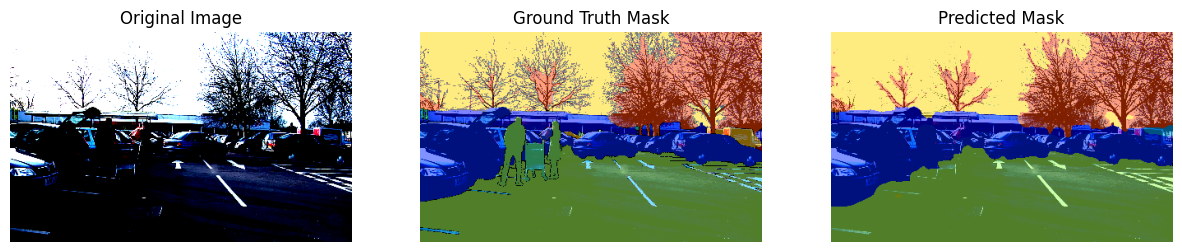

In [56]:
# visualize the masks
import numpy as np
import matplotlib.pyplot as plt
import imageio
from PIL import Image

def visualize_masks_with_composite(image, gt_mask, predicted_mask):
        """Visualize a composite image from multiple mask channels for both ground truth and predicted masks."""
        plt.figure(figsize=(15, 5))

        # Prepare the image
        if image.ndim == 3 and image.shape[0] == 3:
            image = image.transpose(1, 2, 0)  # Convert from [C, H, W] to [H, W, C]

        # Setup color mapping
        colors = plt.cm.jet(np.linspace(0, 1, max(gt_mask.shape[0], predicted_mask.shape[0])))
        
        # Create composite masks
        def create_color_mask(mask):
            color_mask = np.zeros((mask.shape[1], mask.shape[2], 3), dtype=float)
            for i in range(mask.shape[0]):
                layer = mask[i, :, :]
                color_layer = np.stack([layer] * 3, axis=-1) * colors[i][:3]
                color_mask += color_layer
            return color_mask
        
        gt_color_mask = create_color_mask(gt_mask)
        pred_color_mask = create_color_mask(predicted_mask)

        # Plotting
        plt.subplot(1, 3, 1)
        plt.imshow(image)
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(image)
        plt.imshow(gt_color_mask, alpha=0.5)
        plt.title('Ground Truth Mask')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(image)
        plt.imshow(pred_color_mask, alpha=0.5)
        plt.title('Predicted Mask')
        plt.axis('off')

        plt.show()

    # Example usage:
image, gt_mask = test_dataset[100]  # Assuming image is [C, H, W] and mask is [C, H, W]
x_tensor = torch.from_numpy(image).to(DEVICE).unsqueeze(0) if not isinstance(image, torch.Tensor) else image
predicted_mask = Trained_model.predict(x_tensor).squeeze().cpu().numpy().round()  # Obtain predicted mask
visualize_masks_with_composite(image, gt_mask, predicted_mask)


In [60]:
#only takes video of predicted masks
import numpy as np
import matplotlib.pyplot as plt
import torch
import imageio
from PIL import Image

def visualize_predicted_mask(predicted_mask):
    """Generate an image from the predicted mask."""
    # Setup color mapping
    colors = plt.cm.jet(np.linspace(0, 1, predicted_mask.shape[0]))
    
    # Create composite masks
    def create_color_mask(mask):
        color_mask = np.zeros((mask.shape[1], mask.shape[2], 3), dtype=float)
        for i in range(mask.shape[0]):
            layer = mask[i, :, :]
            color_layer = np.stack([layer] * 3, axis=-1) * colors[i][:3]
            color_mask += color_layer
        return color_mask
    
    pred_color_mask = create_color_mask(predicted_mask)
    
    # Create a figure
    fig, ax = plt.subplots(figsize=(5, 5))
    
    # Predicted Mask
    ax.imshow(pred_color_mask)
    ax.set_title('Predicted Mask')
    ax.axis('off')
    
    # Save the figure to a PIL Image object
    fig.canvas.draw()
    img_array = np.array(fig.canvas.renderer.buffer_rgba())
    img_pil = Image.fromarray(img_array)
    
    plt.close(fig)  # Close the figure to avoid display issues
    return img_pil

# Example usage
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
video_frames = []

for idx in range(1, 232):
    image, gt_mask = test_dataset[idx]  # Assuming image is [C, H, W] and mask is [C, H, W]
    x_tensor = torch.from_numpy(image).to(device).unsqueeze(0) if not isinstance(image, torch.Tensor) else image
    predicted_mask = Trained_model.predict(x_tensor).squeeze().cpu().numpy().round()  # Obtain predicted mask
    frame = visualize_predicted_mask(predicted_mask)
    video_frames.append(np.array(frame))

# Save the video using imageio
output_filename = 'realtime_video.mp4'
imageio.mimsave(output_filename, video_frames, fps=30)

print(f"Video saved as {output_filename}")


c:\Users\srira\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (500, 500) to (512, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Video saved as realtime_video.mp4


In [ ]:
##only displays realtime images with predicted masks



In [25]:
#testing video with dark original image
import numpy as np
import matplotlib.pyplot as plt
import torch
import imageio
from PIL import Image

def visualize_masks_with_composite(image, gt_mask, predicted_mask):
    """Generate a composite image from multiple mask channels for both ground truth and predicted masks."""
    # Prepare the image
    if image.ndim == 3 and image.shape[0] == 3:
        image = image.transpose(1, 2, 0)  # Convert from [C, H, W] to [H, W, C]

    # Setup color mapping
    colors = plt.cm.jet(np.linspace(0, 1, max(gt_mask.shape[0], predicted_mask.shape[0])))
    
    # Create composite masks
    def create_color_mask(mask):
        color_mask = np.zeros((mask.shape[1], mask.shape[2], 3), dtype=float)
        for i in range(mask.shape[0]):
            layer = mask[i, :, :]
            color_layer = np.stack([layer] * 3, axis=-1) * colors[i][:3]
            color_mask += color_layer
        return color_mask
    
    gt_color_mask = create_color_mask(gt_mask)
    pred_color_mask = create_color_mask(predicted_mask)
    
    # Create a figure
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    
    # Original Image
    axs[0].imshow(image)
    axs[0].set_title('Original Image')
    axs[0].axis('off')
    
    # Ground Truth Mask
    axs[1].imshow(image)
    axs[1].imshow(gt_color_mask, alpha=0.5)
    axs[1].set_title('Ground Truth Mask')
    axs[1].axis('off')
    
    # Predicted Mask
    axs[2].imshow(image)
    axs[2].imshow(pred_color_mask, alpha=0.5)
    axs[2].set_title('Predicted Mask')
    axs[2].axis('off')
    
    # Save the figure to a PIL Image object
    fig.canvas.draw()
    img_array = np.array(fig.canvas.renderer.buffer_rgba())
    img_pil = Image.fromarray(img_array)
    
    plt.close(fig)  # Close the figure to avoid display issues
    return img_pil

# Example usage
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
video_frames = []

for idx in range(191, 232):
    image, gt_mask = test_dataset[idx]  # Assuming image is [C, H, W] and mask is [C, H, W]
    x_tensor = torch.from_numpy(image).to(device).unsqueeze(0) if not isinstance(image, torch.Tensor) else image
    predicted_mask = Trained_model.predict(x_tensor).squeeze().cpu().numpy().round()  # Obtain predicted mask
    frame = visualize_masks_with_composite(image, gt_mask, predicted_mask)
    video_frames.append(np.array(frame))

# Save the video using imageio
output_filename = 'masks_video.mp4'
imageio.mimsave(output_filename, video_frames, fps=10)

print(f"Video saved as {output_filename}")


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Video saved as masks_video.mp4


In [46]:
#testing video with dark original image
import numpy as np
import matplotlib.pyplot as plt
import torch
import imageio
from PIL import Image

def visualize_masks_with_composite(image, gt_mask, predicted_mask):
    """Generate a composite image from multiple mask channels for both ground truth and predicted masks."""
    # Prepare the image
    if image.ndim == 3 and image.shape[0] == 3:
        image = image.transpose(1, 2, 0)  # Convert from [C, H, W] to [H, W, C]

    # Setup color mapping
    colors = plt.cm.jet(np.linspace(0, 1, max(gt_mask.shape[0], predicted_mask.shape[0])))
    
    # Create composite masks
    def create_color_mask(mask):
        color_mask = np.zeros((mask.shape[1], mask.shape[2], 3), dtype=float)
        for i in range(mask.shape[0]):
            layer = mask[i, :, :]
            color_layer = np.stack([layer] * 3, axis=-1) * colors[i][:3]
            color_mask += color_layer
        return color_mask
    
    gt_color_mask = create_color_mask(gt_mask)
    pred_color_mask = create_color_mask(predicted_mask)
    
    # Create a figure
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    
    # Original Image
    axs[0].imshow(image)
    axs[0].set_title('Original Image')
    axs[0].axis('off')
    
    # Ground Truth Mask
    axs[1].imshow(image)
    axs[1].imshow(gt_color_mask, alpha=0.5)
    axs[1].set_title('Ground Truth Mask')
    axs[1].axis('off')
    
    # Predicted Mask
    axs[2].imshow(image)
    axs[2].imshow(pred_color_mask, alpha=0.5)
    axs[2].set_title('Predicted Mask')
    axs[2].axis('off')
    
    # Save the figure to a PIL Image object
    fig.canvas.draw()
    img_array = np.array(fig.canvas.renderer.buffer_rgba())
    img_pil = Image.fromarray(img_array)
    
    plt.close(fig)  # Close the figure to avoid display issues
    return img_pil

# Example usage
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
video_frames = []

for idx in range(191, 232):
    image, gt_mask = test_dataset[idx]  # Assuming image is [C, H, W] and mask is [C, H, W]
    x_tensor = torch.from_numpy(image).to(device).unsqueeze(0) if not isinstance(image, torch.Tensor) else image
    predicted_mask = Trained_model.predict(x_tensor).squeeze().cpu().numpy().round()  # Obtain predicted mask
    frame = visualize_masks_with_composite(image, gt_mask, predicted_mask)
    video_frames.append(np.array(frame))

# Save the video using imageio
output_filename = 'masks_video_unet.mp4'
imageio.mimsave(output_filename, video_frames, fps=6)

print(f"Video saved as {output_filename}")



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Video saved as masks_video_unet.mp4


In [57]:

import cv2
import os

# Path to the video file
video_path = 'D:\\01_UMCP\\Spring 24\\ENPM 673\\Project 4\\CamVid\\video.mp4'

# Directory to save the frames
output_dir = 'realtime'

# Create the directory if it does not exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Open the video file
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Frame counter
frame_number = 0

while True:
    ret, frame = cap.read()

    if not ret:
        break

    # Construct the output path
    output_path = os.path.join(output_dir, f'frame_{frame_number:04d}.jpg')

    # Save the frame as an image file
    cv2.imwrite(output_path, frame)

    # Print the progress
    print(f'Saved {output_path}')

    # Increment the frame counter
    frame_number += 1

# Release the video capture object
cap.release()

print("Frame extraction complete.")


<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\srira\AppData\Local\Temp\ipykernel_22988\3943180366.py:1: SyntaxWarning: invalid escape sequence '\S'
  dir_video = 'D:\01_UMCP\Spring 24\ENPM 673\Project 4\CamVid\video.mp4'


Saved realtime\frame_0000.jpg
Saved realtime\frame_0001.jpg
Saved realtime\frame_0002.jpg
Saved realtime\frame_0003.jpg
Saved realtime\frame_0004.jpg
Saved realtime\frame_0005.jpg
Saved realtime\frame_0006.jpg
Saved realtime\frame_0007.jpg
Saved realtime\frame_0008.jpg
Saved realtime\frame_0009.jpg
Saved realtime\frame_0010.jpg
Saved realtime\frame_0011.jpg
Saved realtime\frame_0012.jpg
Saved realtime\frame_0013.jpg
Saved realtime\frame_0014.jpg
Saved realtime\frame_0015.jpg
Saved realtime\frame_0016.jpg
Saved realtime\frame_0017.jpg
Saved realtime\frame_0018.jpg
Saved realtime\frame_0019.jpg
Saved realtime\frame_0020.jpg
Saved realtime\frame_0021.jpg
Saved realtime\frame_0022.jpg
Saved realtime\frame_0023.jpg
Saved realtime\frame_0024.jpg
Saved realtime\frame_0025.jpg
Saved realtime\frame_0026.jpg
Saved realtime\frame_0027.jpg
Saved realtime\frame_0028.jpg
Saved realtime\frame_0029.jpg
Saved realtime\frame_0030.jpg
Saved realtime\frame_0031.jpg
Saved realtime\frame_0032.jpg
Saved real